In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib as plt


In [2]:
df= sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#1 - Miissing values and imputing them

In [4]:
#Find out the percentage  of missing values 
df.isnull().sum()/len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
# missing values in dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# drop the dataset of feck in column


In [6]:
df.drop('deck', axis=1, inplace=True)


In [7]:
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# filling the values in dataset 

In [8]:
df['age'].mean()

29.69911764705882

In [9]:
df['age'].median()

28.0

In [10]:
# telling the mode value 0 or 1
df['age'].mode()[0]

24.0

In [11]:
df['age'].fillna(df['age'].mean(), inplace=True)#mean , we replace also median 

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

# fill embark towm with mode

In [13]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

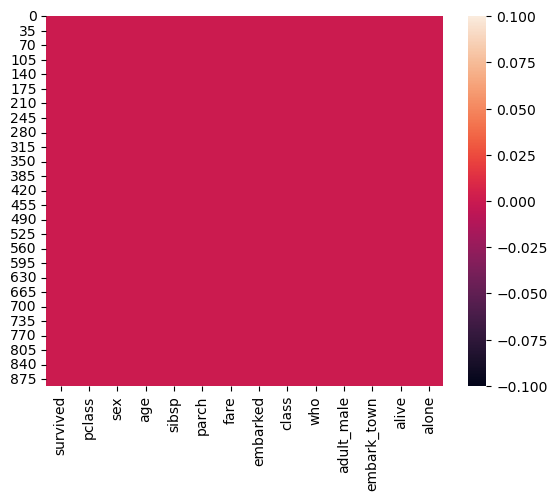

In [15]:
sns.heatmap(df.isnull())

# Binning 

### grouping of numerical data in different categories 

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [17]:
df.age.min()

0.42

In [18]:
df.age.max()

80.0

c:\Users\city\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\city\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

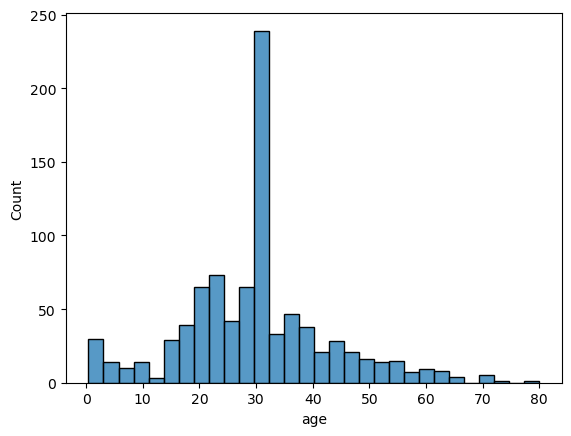

In [19]:
sns.histplot(df['age'])#tell us distribustion of data in how many points 

In [20]:
#Binnign of age into 7 Categories 
bins =[0,1,5,12,18,30,50,80]
#labels
labels = ['Infants','Toddlers','Kid','Teen','Young','Middle_age','Old']
#kis column ko bins mai convert karna ha 
pd.cut(df['age'], bins=bins , labels=labels, )

0           Young
1      Middle_age
2           Young
3      Middle_age
4      Middle_age
          ...    
886         Young
887         Young
888         Young
889         Young
890    Middle_age
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Kid' < 'Teen' < 'Young' < 'Middle_age' < 'Old']

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


# Feature Engineering 

In [22]:
bins =[0,1,5,12,18,30,50,80]
labels = ['Infants','Toddlers','Kid','Teen','Young','Middle_age','Old']
df['Binned_age']=pd.cut(df['age'], bins=bins , labels=labels, )
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Binned_age
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle_age
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle_age
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,Young
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,Young
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Young
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,Young


In [23]:
df['Binned_age'].value_counts()

Binned_age
Young         447
Middle_age    241
Teen           70
Old            64
Toddlers       30
Kid            25
Infants        14
Name: count, dtype: int64

In [24]:
#Renaming a column 
df.rename(columns={'Binned_age':'Aged_Group'}, inplace=True)

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Aged_Group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle_age


# Data Filteration

In [26]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'Aged_Group'],
      dtype='object')

In [27]:
df_01=df[['survived','Aged_Group', 'fare','class']]

In [28]:
df_01.head()

,survived,Aged_Group,fare,class
0,0,Young,7.2500,Third
1,1,Middle_age,71.2833,First
2,1,Young,7.9250,Third
3,1,Middle_age,53.1000,First
4,0,Middle_age,8.0500,Third


In [29]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   Aged_Group  891 non-null    category
 2   fare        891 non-null    float64 
 3   class       891 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 16.3 KB


In [30]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [31]:
# filter the data  based on rows criteria

df_01[df_01['class']=='First']


,survived,Aged_Group,fare,class
1,1,Middle_age,71.2833,First
3,1,Middle_age,53.1000,First
6,0,Old,51.8625,First
11,1,Old,26.5500,First
23,1,Young,35.5000,First
...,...,...,...,...
871,1,Middle_age,52.5542,First
872,0,Middle_age,5.0000,First
879,1,Old,83.1583,First
887,1,Young,30.0000,First


In [32]:
# select the rows pays more done 200 ponda
df_200=df_01[df_01['fare'] > 200]
df_200

,survived,Aged_Group,fare,class
27,0,Young,263.0000,First
88,1,Young,263.0000,First
118,0,Young,247.5208,First
258,1,Middle_age,512.3292,First
299,1,Middle_age,247.5208,First
311,1,Teen,262.3750,First
341,1,Young,263.0000,First
377,0,Young,211.5000,First
380,1,Middle_age,227.5250,First
438,0,Old,263.0000,First


In [33]:
df_200.info()
df_200['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 27 to 779
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    20 non-null     int64   
 1   Aged_Group  20 non-null     category
 2   fare        20 non-null     float64 
 3   class       20 non-null     category
dtypes: category(2), float64(1), int64(1)
memory usage: 1008.0 bytes


class
First     20
Second     0
Third      0
Name: count, dtype: int64

# how to add two filter


In [35]:
df_01[(df_01['fare'] > 70)  &  (df_01['class']== 'First')].sort_values(by='fare')

,survived,Aged_Group,fare,class
540,1,Middle_age,71.0000,First
745,0,Old,71.0000,First
1,1,Middle_age,71.2833,First
366,1,Old,75.2500,First
218,1,Middle_age,76.2917,First
...,...,...,...,...
438,0,Old,263.0000,First
27,0,Young,263.0000,First
679,1,Middle_age,512.3292,First
258,1,Middle_age,512.3292,First
